Spatiotemporal Data Analyis

In [55]:
# connect to the google drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# change dir 
%cd /content/drive/MyDrive/Colab\ Notebooks/STDA/final_assignment/

/content/drive/MyDrive/Colab Notebooks/STDA/final_assignment


In [57]:
# install packages 
!pip install contextily
!pip install geopandas
!pip install libpysal
!pip install esda
!pip install spreg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#load the packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily
import geopandas as gpd
import esda as es
import libpysal as ps

from sklearn.linear_model import LinearRegression
import spreg as sp


## Predicting the average income in the Netherlands with spatial autoregression


In [59]:

#
#  3.1 Load the dataset "Gementen data.csv"

# load the dataset
df = pd.read_csv("data/Gemeenten_dataset.csv")
# print the head of dat
print(df.head(5))
# Checking the null values 
print("Any Null values?", df.isnull().any().sum())

# load the base map 
# loads the shapefile
townships = gpd.read_file("data/bu_wk_gm2020_shapes/Gemeenten2020.shp")
townships.head()

  GM_CODE     GM_NAAM  ELEVATION  LATITUDE  LONGITUDE  Average_House_Price  \
0  GM0003  Appingedam       0.48     53.32       6.85                194.8   
1  GM0010    Delfzijl       2.03     53.33       6.92                155.1   
2  GM0014   Groningen      14.02     53.22       6.55                258.9   
3  GM0024   Loppersum       2.00     53.33       6.75                192.4   
4  GM0034      Almere       1.92     52.37       5.22                294.3   

   Average_Income  Population_Density  
0            21.6                 493  
1            22.0                 186  
2            23.3                1257  
3            22.6                 192  
4            24.7                1662  
Any Null values? 0


,GM_CODE,WATER,SHAPE_Leng,SHAPE_Area,JRSTATCODE,GM_NAAM,geometry
0,GM0003,NEE,26201.130337,2.457996e+07,2020GM0003,Appingedam,"POLYGON ((249539.950 593217.579, 249543.450 59..."
1,GM0010,NEE,143224.062477,1.362080e+08,2020GM0010,Delfzijl,"MULTIPOLYGON (((267829.905 587996.480, 267824...."
2,GM0014,NEE,98454.011502,1.979605e+08,2020GM0014,Groningen,"POLYGON ((227979.943 584879.819, 227981.153 58..."
3,GM0024,NEE,64612.053242,1.119892e+08,2020GM0024,Loppersum,"POLYGON ((244952.159 601043.418, 244954.500 60..."
4,GM0034,NEE,77001.560697,1.392038e+08,2020GM0034,Almere,"MULTIPOLYGON (((142993.687 482642.725, 142993...."


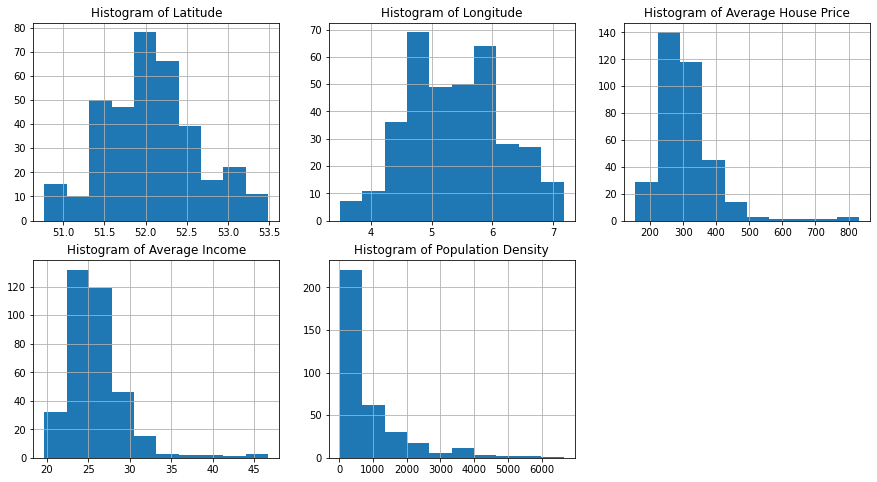

In [60]:
# 3.1 Create histogram plots of the latitude, longitude, average income, average house price and population density
plt.figure(figsize = (15,8))

plt.subplot(231),df['LATITUDE'].hist(bins= 10),plt.title("Histogram of Latitude")
plt.subplot(232),df['LONGITUDE'].hist(bins= 10),plt.title("Histogram of Longitude")
plt.subplot(233),df['Average_House_Price'].hist(bins= 10),plt.title("Histogram of Average House Price")
plt.subplot(234),df['Average_Income'].hist(bins= 10),plt.title("Histogram of Average Income")
plt.subplot(235),df['Population_Density'].hist(bins= 10),plt.title("Histogram of Population Density")

plt.show()

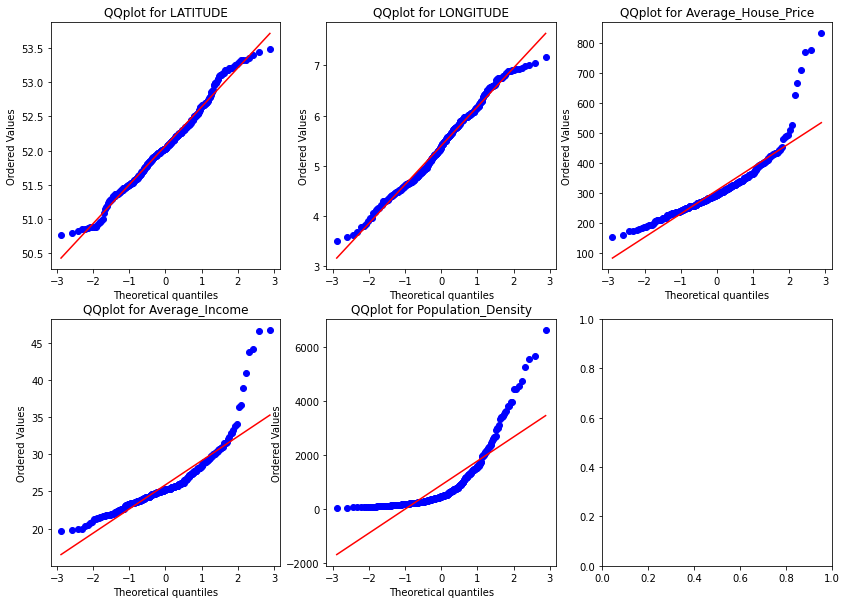

In [61]:
# 3.1 plotting QQplot the look at the data more closely. 

import scipy.stats as stats
# create subplots 
fig, ax = plt.subplots(2,3, figsize=(14,10))

# plot the qqplots
stats.probplot(df['LATITUDE'], dist='norm', plot=ax[0,0],fit=False)
stats.probplot(df['LONGITUDE'], dist='norm', plot=ax[0,1],fit=False)
stats.probplot(df['Average_House_Price'], dist='norm', plot=ax[0,2],fit=False)
stats.probplot(df['Average_Income'], dist='norm', plot=ax[1,0],fit=False)
stats.probplot(df['Population_Density'],dist='norm', plot=ax[1,1],fit=False)

# set title 

ax[0,0].set_title("QQplot for LATITUDE")
ax[0,1].set_title("QQplot for LONGITUDE")
ax[0,2].set_title("QQplot for Average_House_Price")
ax[1,0].set_title("QQplot for Average_Income")
ax[1,1].set_title("QQplot for Population_Density")

plt.show()

<font color='blue'> 
Based on the Histograms and QQplot of columns, I can conclude that only "LATITUDE" and "LONGITUDE" conlumns are normally distributed. Other three columns are positively skewed.
</font>


Text(0.5, 0.98, 'Dot density map per Average_Income')

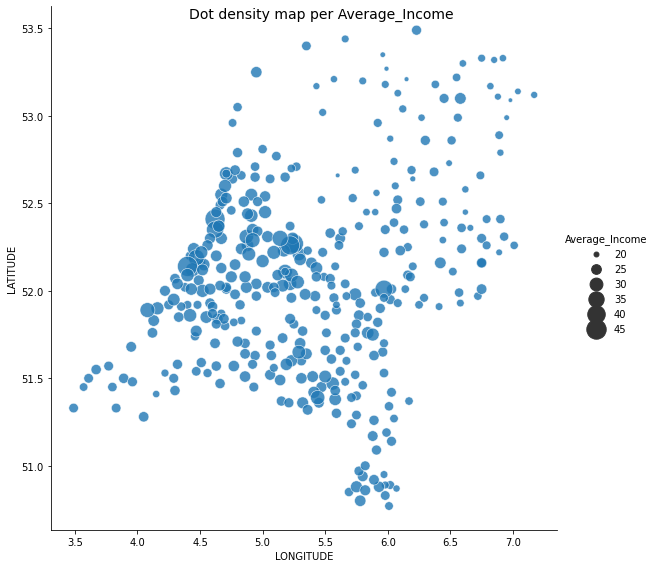

In [62]:

#[5 points] Display the latitude and longitude in a dot density map with a dot size corresponding to average income (the data in the column Average Income).

g= sns.relplot(x='LONGITUDE', y='LATITUDE',  
               size="Average_Income",
               sizes=(20, 400), 
               alpha=.8, 
               palette="muted", 
               height = 8, 
               data=df )
g.fig.suptitle("Dot density map per Average_Income",
                  fontsize=14, fontdict={"weight": "bold"})

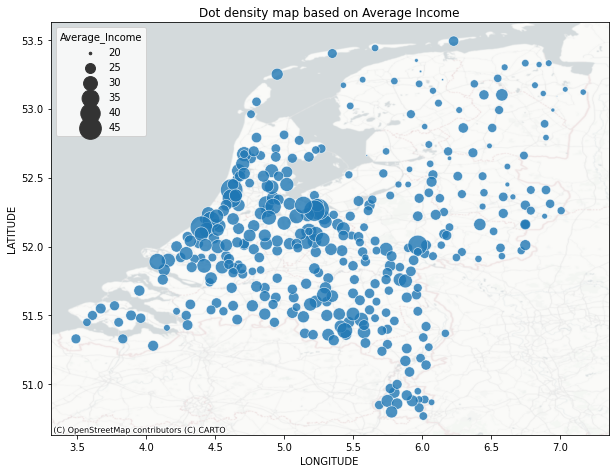

In [63]:

#[5 points] Display the latitude and longitude in a dot density map with a dot size corresponding to average income (the data in the column Average Income).

fig, ax = plt.subplots( figsize = (10, 10 ))
g= sns.scatterplot(x='LONGITUDE', y='LATITUDE',  
               size="Average_Income",
               sizes=(1, 500), 
               alpha=.8, 
               palette="muted", 
  
               data=df ).set_title("Dot density map based on Average Income")

g = contextily.add_basemap(
    ax= ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);


In [64]:
# create a function for task-3

def global_local_I(data, col_moran, longitude, latitude, w_scheme, k = None, distance_value = None):
    
    """ This function calculates Global and local I with distance and KNN based weight schemes

    Args:
      data: whole dataset
      col_moran : column data to calculate Moran's I 
      longitide: coordinate 
      latitude: coordinate 
      w_scheme: name of weighted schemes, distance or KNN
      k: number neighbours
      distance_value: distance value for distance based weight transformation 

    Returns:
      I_income_local: result of local Moran's I of distance based weight schemes 
      I_local_KNN: result of local Moran's I of KNN 
    """  
    

  # calculating Distance based weight scheme and Global Moran's I
    if w_scheme == "distance":
      W_dis = ps.weights.DistanceBand.from_array(data.loc[data.index,[longitude, latitude]].values,distance_value) # calculate distance based weight scehmes 
      W_dis.transform = 'r' # normalize the data 
      I_income = es.moran.Moran(col_moran.values, W_dis) # calculate Global Moran's I

      # calculate local Moran's I with distance based schemes 
      I_income_local = es.moran.Moran_Local(col_moran.values, W_dis)

      print(f"Global Moran's I using Distance based schemes :", round(I_income.I, 7),"|", "p-value:",I_income.p_sim,"|", "distance value = ", distance_value)

      return I_income_local # return Local Moran's I 

      
    # calculating KNN based weight scheme and Global Moran's I
    elif w_scheme =="KNN":

      W_KNN = ps.weights.KNN.from_array(data.loc[data.index,[longitude, latitude]].values,k ) # calculate KNN based weight schemes 
      W_KNN.transform = 'r' # Normalize the data 
      I_income = es.moran.Moran(col_moran.values , W_KNN) # calculate Global Moran's I 

      # calculate Local
      I_local_KNN = es.moran.Moran_Local(col_moran.values, W_KNN) 
      print(f"Global Moran's I using KNN based schemes :", round(I_income.I, 6), "|", "p-value:",I_income.p_sim,"|", "k = ", k)
      return I_local_KNN



In [65]:
# calculating Global Moran's I using Distance based weight scheme with different distance values without log tranformation 
for i in range(3,11):

  global_local_I(w_scheme='distance', 
                data = df , 
                col_moran = df["Average_Income"],
                longitude="LONGITUDE", 
                latitude='LATITUDE',  
                k = None, 
                distance_value = i*0.1) # i*0.1 is for looping between 0.3 to 1



#  with log tranformation 

# calculate log tranformation
log_data = np.log(df['Average_Income'])

# to find best distance value between 0.3 and 1. 
print()
print("*"*30, "Distance base weight schemes after the log transformation", "*"*30, "\n")
for i in range(3,11):

  global_local_I(w_scheme='distance', 
                data = df , 
                col_moran = log_data,
                longitude="LONGITUDE", 
                latitude='LATITUDE',  
                k = None, 
                distance_value = i*0.1) # i*0.1 is for looping between 0.3 to 1

Global Moran's I using Distance based schemes : 0.3526557 | p-value: 0.001 | distance value =  0.30000000000000004
Global Moran's I using Distance based schemes : 0.3093135 | p-value: 0.001 | distance value =  0.4
Global Moran's I using Distance based schemes : 0.2696349 | p-value: 0.001 | distance value =  0.5
Global Moran's I using Distance based schemes : 0.2376376 | p-value: 0.001 | distance value =  0.6000000000000001
Global Moran's I using Distance based schemes : 0.2228065 | p-value: 0.001 | distance value =  0.7000000000000001
Global Moran's I using Distance based schemes : 0.2126797 | p-value: 0.001 | distance value =  0.8
Global Moran's I using Distance based schemes : 0.1991568 | p-value: 0.001 | distance value =  0.9
Global Moran's I using Distance based schemes : 0.1802577 | p-value: 0.001 | distance value =  1.0

****************************** Distance base weight schemes after the log transformation ****************************** 

Global Moran's I using Distance based s

In [66]:
# calculating KNN based scheme with different k
# calculating Global Moran's I using Distance based weight scheme with different distance values without log tranformation 
for i in range(3,11):

  global_local_I(w_scheme='KNN', 
                data = df , 
                col_moran = df["Average_Income"],
                longitude="LONGITUDE", 
                latitude='LATITUDE',  
                k = i, 
                distance_value = None) # i*0.1 is for looping between 0.3 to 1



#  with log tranformation 

# calculate log tranformation
log_data = np.log(df['Average_Income'])

# to find best distance value between 0.3 and 1. 
print()
print("*"*30, "KNN base weight schemes after the log transformation", "*"*30, "\n")
for i in range(3,11):

  global_local_I(w_scheme='KNN', 
                data = df , 
                col_moran = log_data,
                longitude="LONGITUDE", 
                latitude='LATITUDE',  
                k = i, 
                distance_value = None)

Global Moran's I using KNN based schemes : 0.496857 | p-value: 0.001 | k =  3
Global Moran's I using KNN based schemes : 0.488474 | p-value: 0.001 | k =  4
Global Moran's I using KNN based schemes : 0.454114 | p-value: 0.001 | k =  5
Global Moran's I using KNN based schemes : 0.443471 | p-value: 0.001 | k =  6
Global Moran's I using KNN based schemes : 0.430094 | p-value: 0.001 | k =  7
Global Moran's I using KNN based schemes : 0.413502 | p-value: 0.001 | k =  8
Global Moran's I using KNN based schemes : 0.403247 | p-value: 0.001 | k =  9
Global Moran's I using KNN based schemes : 0.391068 | p-value: 0.001 | k =  10

****************************** KNN base weight schemes after the log transformation ****************************** 

Global Moran's I using KNN based schemes : 0.548105 | p-value: 0.001 | k =  3
Global Moran's I using KNN based schemes : 0.540421 | p-value: 0.001 | k =  4
Global Moran's I using KNN based schemes : 0.508384 | p-value: 0.001 | k =  5
Global Moran's I using 

Global Moran's I using KNN based schemes : 0.496857 | p-value: 0.001 | k =  3


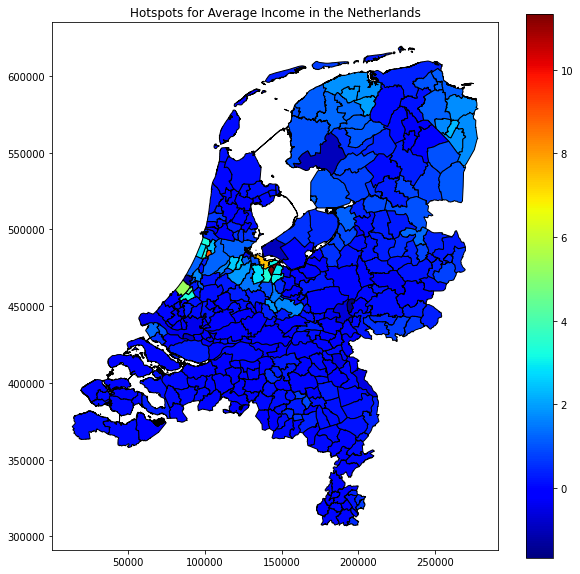

In [67]:
# Calculate local auto correlation for Average_income column with KNN (k =3)

local_I =  global_local_I(w_scheme='KNN', 
                data = df , 
                col_moran = df["Average_Income"],
                longitude="LONGITUDE", 
                latitude='LATITUDE',  
                k = 3, 
                distance_value = None)# function defined in 3


land_townships= townships[townships.WATER =="NEE"] # keep only the land map 
        
land_townships.assign(cl=local_I.Is).plot(figsize=(10,10),column='cl',cmap='jet', edgecolor='k', legend=True)
plt.title("Hotspots for Average Income in the Netherlands")
plt.show()

Global Moran's I using KNN based schemes : 0.548105 | p-value: 0.001 | k =  3


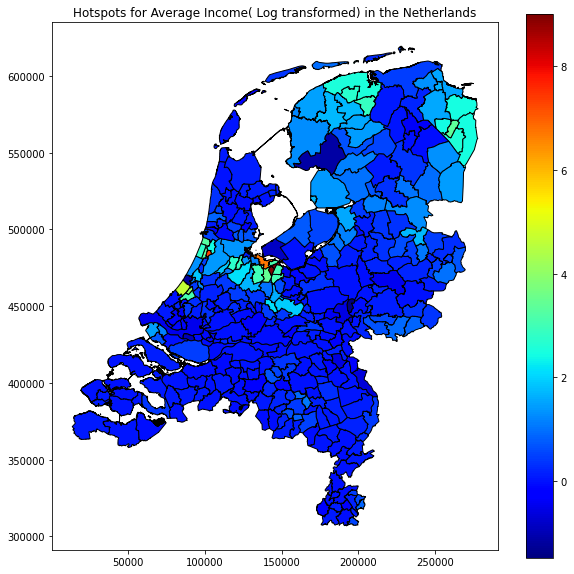

In [68]:
#  with log tranformation 

# calculate log tranformation
log_data = np.log(df['Average_Income'])

# calculate local I 
local_I = global_local_I(w_scheme='KNN', 
                data = df , 
                col_moran = log_data,
                longitude="LONGITUDE", 
                latitude='LATITUDE',  
                k = 3, 
                 distance_value = None) # this function is defined in 3

land_townships= townships[townships.WATER =="NEE"] # keep only the land map 
        
land_townships.assign(cl=local_I.Is).plot(figsize=(10,10),column='cl',cmap='jet', edgecolor='k', legend=True)
plt.title("Hotspots for Average Income( Log transformed) in the Netherlands")
plt.show()

In [69]:

# Your code goes here 
#a) Fit a baseline linear regression model, where your target variable is the average income (the column Average Income) and your features 
# (exploratory variables) are the columns Population Density and Average House Price. [3 points]

# target value
y = df.Average_Income 
# features
X= df[["Average_House_Price","Population_Density"]]
print(X.columns.values)

lr = LinearRegression()
lr.fit(X,y)
print( lr.coef_, "Intercept:", lr.intercept_)


['Average_House_Price' 'Population_Density']
[0.03771909 0.00012411] Intercept: 14.136503703095627


In [70]:
# linear regression with Spreg.OLS() 
model_1 = sp.OLS(
    # Dependent variable
    y.values[:, None], 
    # Independent variables
    X.values,
    # Dependent variable name
    name_y="Average_Income", 
    # Independent variable name
    name_x=["Average_House_Price","Population_Density"]
)
print(model_1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income                Number of Observations:         355
Mean dependent var  :     25.8949                Number of Variables   :           3
S.D. dependent var  :      3.5815                Degrees of Freedom    :         352
R-squared           :      0.8149
Adjusted R-squared  :      0.8139
Sum squared residual:     840.496                F-statistic           :    774.8513
Sigma-square        :       2.388                Prob(F-statistic)     :  1.155e-129
S.E. of regression  :       1.545                Log likelihood        :    -656.706
Sigma-square ML     :       2.368                Akaike info criterion :    1319.412
S.E of regression ML:      1.5387                Schwarz criterion     :    1331.028

---------------------------------------------------------------------------

In [71]:
#(b) One of the spatially lag variables that we think may affect the average income is the average house price. Using a weighting scheme of your choice, assigned (create) a spatial lag based on the average house price. 
#Run the model, which has the same setup as in (a), with the exception that it includes this spatial lag. [3 points]

# calculate KNN based weight schemes with k=7
W_KNN = ps.weights.KNN.from_array(df.loc[df.index,["LONGITUDE", "LATITUDE"]].values, k=7) # calculate KNN based weight schemes 
W_KNN.transform = 'r' # Normalize the data

df= df.assign(housePrice_KNN_lag=ps.weights.lag_spatial(W_KNN, df['Average_House_Price'].values))

X1= df[["Average_House_Price","Population_Density", "housePrice_KNN_lag"]] # select the extra feature

# run the model again 

model_2 = sp.OLS(
    # Dependent variable
    y.values[:, None], 
    # Independent variables
    X1.values,
    # Dependent variable name
    name_y="Average_Income", 
    # Independent variable name
    name_x=["Average_House_Price","Population_Density", "housePrice_KNN_lag"]
)
print(model_2.summary)


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income                Number of Observations:         355
Mean dependent var  :     25.8949                Number of Variables   :           4
S.D. dependent var  :      3.5815                Degrees of Freedom    :         351
R-squared           :      0.8168
Adjusted R-squared  :      0.8152
Sum squared residual:     832.027                F-statistic           :    521.5336
Sigma-square        :       2.370                Prob(F-statistic)     :  6.148e-129
S.E. of regression  :       1.540                Log likelihood        :    -654.908
Sigma-square ML     :       2.344                Akaike info criterion :    1317.817
S.E of regression ML:      1.5309                Schwarz criterion     :    1333.305

---------------------------------------------------------------------------

In [72]:
# (c) Using "GM Lag", run a spatial autoregression model with the lag of Average Income and the features in (a).[3 points]

model_3 = sp.GM_Lag(y.values[:, None], X.values, w = W_KNN, name_y='Average_Income', name_x= ["Average_House_Price","Population_Density"])
print(model_3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Average_Income                Number of Observations:         355
Mean dependent var  :     25.8949                Number of Variables   :           4
S.D. dependent var  :      3.5815                Degrees of Freedom    :         351
Pseudo R-squared    :      0.8129
Spatial Pseudo R-squared:  0.8155

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      14.5470972       1.0547555      13.7919139       0.0000000
 Average_House_Price       0.0380540       0.0012696      29.9726601       0.0000000
  Population_Density       0.0001424       0.0000902     

In [73]:
#(d) Using "GM Lag", run a spatial autoregression model with the lag of Average Income with the Population Density, Average House Price and the spatial lag of the Average House Price. 
# (The features used in (b)). [3 points]
W_KNN_2 = ps.weights.KNN.from_array(df.loc[df.index,["LONGITUDE", "LATITUDE"]].values, k=9) # calculate KNN based weight schemes k = 9
W_KNN_2.transform = 'r' # Normalize the data

X2= df[["Average_House_Price","Population_Density", "housePrice_KNN_lag"]]

model_4 = sp.GM_Lag(y.values[:, None], X2.values, w = W_KNN_2, name_y='Average_Income_Log', name_x= ["Average_House_Price_Log","Population_Density_Log", "housePrice_KNN_lag"])
print(model_4.summary)



REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Average_Income_Log                Number of Observations:         355
Mean dependent var  :     25.8949                Number of Variables   :           5
S.D. dependent var  :      3.5815                Degrees of Freedom    :         350
Pseudo R-squared    :      0.8605
Spatial Pseudo R-squared:  0.8017

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       5.2945390       1.9850751       2.6671731       0.0076492
Average_House_Price_Log       0.0388502       0.0011070      35.0944329       0.0000000
Population_Density_Log       0.0000032       0.000

In [74]:
# (e) Compute the mean square error for the regressors in (a), (b), (c) and (d). Which regressor model resulted in the lowest mean square error? [3 points]

from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y.values[:, None], model_1.predy.flatten()), \
                  'OLS+ spatial lag': mse(y.values[:, None], model_2.predy.flatten()), \
                  'GM_Lag': mse(y.values[:, None], model_3.predy_e), \
                 'OLS+ spatial lag+ GM_Lag': mse(y.values[:, None], model_4.predy_e)})
print(mses.sort_values())

OLS+ spatial lag            2.343738
GM_Lag                      2.359587
OLS                         2.367593
OLS+ spatial lag+ GM_Lag    2.545265
dtype: float64




<font color='blue'> 
Which regressor model resulted in the lowest mean square error? 

Answer: 
Model_2: OLS+ spatial lag   
</font>

In [75]:
#
# Perform a log transformation of the Population Density, Average House Price and Average Income
df_short= df[["Average_Income", "Population_Density","Average_House_Price" ]]

# log transformation for selected columns
df_log = np.log(df_short)

# assign X and y 
y_log = df_log.Average_Income

X_log = df_log[["Population_Density","Average_House_Price"]]
print(X_log.head())
# 

   Population_Density  Average_House_Price
0            6.200509             5.271973
1            5.225747             5.044070
2            7.136483             5.556442
3            5.257495             5.259577
4            7.415777             5.684600


In [76]:
# model_1
# linear regression with Spreg.OLS() 
model_1_Log = sp.OLS(
    # Dependent variable
    y_log.values[:, None], 
    # Independent variables
    X_log.values,
    # Dependent variable name
    name_y="Average_Income_Log", 
    # Independent variable name
    name_x=["Average_House_Price_Log","Population_Density_Log"]
)
print(model_1_Log.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income_Log                Number of Observations:         355
Mean dependent var  :      3.2459                Number of Variables   :           3
S.D. dependent var  :      0.1241                Degrees of Freedom    :         352
R-squared           :      0.7499
Adjusted R-squared  :      0.7485
Sum squared residual:       1.363                F-statistic           :    527.7542
Sigma-square        :       0.004                Prob(F-statistic)     :  1.159e-106
S.E. of regression  :       0.062                Log likelihood        :     483.593
Sigma-square ML     :       0.004                Akaike info criterion :    -961.186
S.E of regression ML:      0.0620                Schwarz criterion     :    -949.570

-----------------------------------------------------------------------

In [77]:
# model_2
# calculate KNN based weight schemes with k=3

X_log = X_log.assign(housePrice_KNN_lag=ps.weights.lag_spatial(W_KNN, X_log['Average_House_Price'].values)) # W_KNN (weight schemes) is already calculated in 3.5

X_log_1= X_log[["Average_House_Price","Population_Density", "housePrice_KNN_lag"]] # select the extra feature

# run the model again 

model_2_Log = sp.OLS(
    # Dependent variable
    y_log.values[:, None], 
    # Independent variables
    X_log_1.values,
    # Dependent variable name
    name_y="Average_Income_Log", 
    # Independent variable name
    name_x=["Average_House_Price_Log","Population_Density_Log", "housePrice_KNN_lag"]
)
print(model_2_Log.summary)


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :Average_Income_Log                Number of Observations:         355
Mean dependent var  :      3.2459                Number of Variables   :           4
S.D. dependent var  :      0.1241                Degrees of Freedom    :         351
R-squared           :      0.7579
Adjusted R-squared  :      0.7559
Sum squared residual:       1.319                F-statistic           :    366.3345
Sigma-square        :       0.004                Prob(F-statistic)     :  9.928e-108
S.E. of regression  :       0.061                Log likelihood        :     489.378
Sigma-square ML     :       0.004                Akaike info criterion :    -970.756
S.E of regression ML:      0.0610                Schwarz criterion     :    -955.267

-----------------------------------------------------------------------

In [78]:
#model_3


# try to different k value for KNN distance based weight schemes to avoid "LinAlgError: Singular matrix" error 

W_KNN = ps.weights.KNN.from_array(df.loc[df.index,["LONGITUDE", "LATITUDE"]].values, k=6) # calculate KNN based weight schemes 
W_KNN.transform = 'r' # Normalize the data
# Using "GM Lag", run a spatial autoregression model 


model_3_Log= sp.GM_Lag(y_log.values[:, None], X_log.values, w = W_KNN, name_y='Average_Income_Log', name_x= ["Average_House_Price_Log","Population_Density_Log"]) # W_KNN is calculated in 3.6 with k=6
print(model_3_Log.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Average_Income_Log                Number of Observations:         355
Mean dependent var  :      3.2459                Number of Variables   :           5
S.D. dependent var  :      0.1241                Degrees of Freedom    :         350
Pseudo R-squared    :      0.8162
Spatial Pseudo R-squared:  0.7640

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       0.3951388       0.1304223       3.0296877       0.0024481
Average_House_Price_Log       0.0067027       0.0035857       1.8692850       0.0615832
Population_Density_Log       0.4734825       0.017

In [79]:
#model_4
#(d) Using "GM Lag", run a spatial autoregression model with the lag of Average Income with the Population Density, Average House Price and the spatial lag of the Average House Price. 
# (The features used in (b)). [3 points]
W_KNN_2 = ps.weights.KNN.from_array(df.loc[df.index,["LONGITUDE", "LATITUDE"]].values, k=9) # calculate KNN based weight schemes k = 9
W_KNN_2.transform = 'r' # Normalize the data

X2_log= X_log[["Average_House_Price","Population_Density", "housePrice_KNN_lag"]]

model_4_Log = sp.GM_Lag(y.values[:, None], X2.values, w = W_KNN_2, name_y='Average_Income', name_x= ["Average_House_Price","Population_Density", "housePrice_KNN_lag"])
print(model_4_Log.summary)





REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Average_Income                Number of Observations:         355
Mean dependent var  :     25.8949                Number of Variables   :           5
S.D. dependent var  :      3.5815                Degrees of Freedom    :         350
Pseudo R-squared    :      0.8605
Spatial Pseudo R-squared:  0.8017

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       5.2945390       1.9850751       2.6671731       0.0076492
 Average_House_Price       0.0388502       0.0011070      35.0944329       0.0000000
  Population_Density       0.0000032       0.0000812     

In [83]:
from sklearn.metrics import mean_squared_error as mse

# all values are converted to original form using np.exp() 

# calculate mse 
mses_log = pd.Series({'OLS': mse(y.values, np.exp(model_1_Log.predy.flatten())), \
                  'OLS+ spatial lag': mse(y.values, np.exp(model_2_Log.predy.flatten())), \
                  'GM_Lag': mse(y.values, np.exp(model_3_Log.predy_e)), \
                 'OLS+ spatial lag+ GM_Lag': mse(y.values, np.exp(model_4_Log.predy_e))})

print("MSE comparison before and after applying log transformation\n")
print("MSE before log transformation:\n", mses ,"\n")
print("*"*40)
print("MSE after log transformation:\n", mses_log)

MSE comparison before and after applying log transformation

MSE before log transformation:
 OLS                         2.367593
OLS+ spatial lag            2.343738
GM_Lag                      2.359587
OLS+ spatial lag+ GM_Lag    2.545265
dtype: float64 

****************************************
MSE after log transformation:
 OLS                         2.897634e+00
OLS+ spatial lag            2.710421e+00
GM_Lag                      2.647181e+00
OLS+ spatial lag+ GM_Lag    1.882227e+37
dtype: float64




<font color='blue'> 
Only model-4 with log transformation performed better. All other models performed better without log transformation 
</font>